# 2. Data Understanding

## 2.1 Collect initial data

For this question we've only used the Student questionnaire data (from 2022), collected from the folowing link: https://webfs.oecd.org/pisa2022/index.html

The dataset was originally in a .sas7bdat format and was converted to a .csv file.

### Student Data

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

In [1]:
import pandas as pd

#student = pd.read_sas(
#    "../../databases/2022/STU_QQQ_SAS/CY08MSP_STU_QQQ.SAS7BDAT", format="sas7bdat"
#)

student = pd.read_csv('../../../databases/2022/STU_QQQ_SAS/student2022.csv')

## 2.2 Describe data

O datatset original contém 1278 features

In [3]:
student.head(5)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,800,ALB03,80000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,800,ALB03,80000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,800,ALB01,80000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,800,ALB08,80000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,800,ALB03,80000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [4]:
from tabulate import tabulate

categorical_columns = student.select_dtypes(include=["object", "category"]).columns
numeric_columns = student.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

O dataset está composto por 1274 colunas numéricas e apenas 4 colunas categóricas.

In [5]:
student.describe()

,CNTRYID,CNTSCHID,CNTSTUID,NatCen,SUBNATIO,REGION,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,...,PV2MPRE,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT
count,613744.000000,6.137440e+05,6.137440e+05,613744.000000,6.137440e+05,613744.000000,613744.000000,613744.000000,602876.000000,613744.000000,...,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,592123.000000,613744.000000
mean,434.807781,4.348123e+07,4.342643e+07,43422.252934,4.348098e+06,43482.180478,0.480912,1.964772,319.202418,319.430137,...,442.271452,442.058179,442.014647,441.830879,442.035637,441.936271,442.161419,442.089600,442.073530,0.651738
std,255.846503,2.558506e+07,2.548515e+07,25488.509407,2.558485e+06,25585.242666,0.499636,0.184356,170.070303,172.095638,...,107.162477,107.411664,107.309852,107.613213,107.274656,107.179482,107.017426,107.333904,107.076819,0.405159
min,8.000000,8.000010e+05,8.000010e+05,800.000000,8.000000e+04,800.000000,0.000000,1.000000,113.000000,113.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.524000,0.000000,0.004990
25%,214.000000,2.140006e+07,2.140198e+07,21400.000000,2.140000e+06,21400.000000,0.000000,2.000000,156.000000,156.000000,...,363.976000,363.671500,363.810500,363.211000,363.566500,363.694000,364.194500,363.738000,364.147500,0.368080
50%,398.000000,3.980055e+07,3.981988e+07,39800.000000,3.980000e+06,39817.000000,0.000000,2.000000,313.000000,313.000000,...,437.279000,437.424000,436.909000,436.795000,437.057000,436.830000,437.336000,437.054000,437.074000,0.682440
75%,688.000000,6.880013e+07,6.880501e+07,68800.000000,6.880000e+06,68800.000000,1.000000,2.000000,449.000000,442.000000,...,516.985000,517.176500,516.823500,517.002500,516.858500,516.374000,516.996000,516.967500,516.440000,0.826460
max,901.000000,9.010018e+07,8.600749e+07,86000.000000,9.010000e+06,90100.000000,1.000000,2.000000,998.000000,998.000000,...,920.868000,940.027000,918.080000,906.043000,939.225000,904.258000,893.024000,943.962000,945.504000,11.643580


In [6]:
vocational_education_teachers = student[student["OCOD3"].isin([232, 2320])]
vocational_education_teachers

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
19546,ARG,32.0,3200157.0,3206961.0,08MS,3200,ARG11,320000,3200.0,0.0,...,416.006,413.965,486.274,504.491,494.137,490.786,534.109,447.279,1.46411,01MAY23:16:18:14
37393,AUS,36.0,3600655.0,3617138.0,08MS,3600,AUS21,360000,3600.0,1.0,...,455.232,483.792,412.762,369.885,472.069,358.065,458.974,478.199,0.09116,02MAY23:09:32:31
39588,AUT,40.0,4000067.0,4000289.0,08MS,4000,AUT97,400000,4000.0,1.0,...,682.995,662.547,718.368,668.039,641.640,649.198,647.550,677.124,0.91134,02MAY23:07:39:11
40312,AUT,40.0,4000208.0,4001460.0,08MS,4000,AUT97,400000,4000.0,1.0,...,342.475,445.921,364.240,387.143,454.387,405.087,401.367,390.144,0.57496,02MAY23:07:39:11
40409,AUT,40.0,4000073.0,4001629.0,08MS,4000,AUT97,400000,4000.0,1.0,...,562.996,597.437,557.713,554.977,605.855,555.756,564.143,566.756,1.33244,02MAY23:07:39:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590443,GBR,826.0,82600031.0,82612925.0,08MS,82700,QUK34,8260000,82613.0,1.0,...,416.611,367.490,435.109,446.685,424.436,433.265,424.255,338.339,0.10523,02MAY23:12:46:02
596249,USA,840.0,84000101.0,84001768.0,08MS,84000,USA04,8400000,84000.0,1.0,...,532.178,504.871,538.187,499.016,524.002,514.696,544.872,534.015,0.85480,02MAY23:13:08:34
598508,USA,840.0,84000097.0,84005777.0,08MS,84000,USA04,8400000,84000.0,1.0,...,486.356,482.256,465.739,462.225,480.721,421.415,422.758,542.255,1.17037,02MAY23:13:08:34
604957,URY,858.0,85800051.0,85806169.0,08MS,85800,URY09,8580000,85800.0,0.0,...,503.148,392.442,292.168,454.145,381.723,419.739,308.348,406.862,1.06139,01MAY23:18:21:31


In [ ]:
vocational_students = student[student["ISCEDP"].isin([254, 354, 453])]
vocational_students

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
30,ALB,8.0,800281.0,800038.0,08MS,800,ALB03,80000,800.0,0.0,...,273.403,183.583,300.135,354.247,294.313,294.710,253.103,306.971,0.57916,03MAY23:10:11:25
36,ALB,8.0,800174.0,800046.0,08MS,800,ALB03,80000,800.0,0.0,...,414.075,377.172,475.286,369.760,414.562,418.155,369.578,450.998,0.65757,03MAY23:10:11:25
43,ALB,8.0,800095.0,800054.0,08MS,800,ALB01,80000,800.0,0.0,...,275.096,324.471,256.244,273.254,288.208,232.299,228.232,348.223,0.63145,03MAY23:10:11:26
57,ALB,8.0,800201.0,800072.0,08MS,800,ALB03,80000,800.0,0.0,...,244.287,342.591,272.285,251.317,219.597,213.795,325.884,257.593,0.62612,03MAY23:10:11:25
65,ALB,8.0,800174.0,800081.0,08MS,800,ALB03,80000,800.0,0.0,...,422.406,367.206,463.073,355.496,422.940,445.600,421.878,403.640,0.65428,03MAY23:10:11:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613586,UZB,860.0,86000013.0,86007329.0,08MS,86000,UZB01,8600000,86000.0,0.0,...,298.207,265.868,401.472,277.104,386.625,281.992,302.922,381.238,0.71124,02MAY23:13:18:13
613638,UZB,860.0,86000079.0,86007381.0,08MS,86000,UZB06,8600000,86000.0,0.0,...,380.473,370.181,354.164,377.314,370.484,427.406,411.393,321.509,0.48363,02MAY23:13:18:13
613700,UZB,860.0,86000152.0,86007446.0,08MS,86000,UZB04,8600000,86000.0,0.0,...,196.956,185.659,163.087,70.291,212.197,79.717,223.045,270.012,0.59024,02MAY23:13:18:13
613706,UZB,860.0,86000102.0,86007454.0,08MS,86000,UZB03,8600000,86000.0,0.0,...,346.482,362.319,298.217,361.346,327.345,354.710,315.289,351.825,0.79944,02MAY23:13:18:13


Podemos observar que no total existem 613,744 estudantes, dos quais 75,660 estão em cursos vocacionais.

In [7]:
non_vocational_students = student[student["ISCEDP"].isin([244, 341, 343, 344])]
non_vocational_students

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,800,ALB03,80000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,800,ALB03,80000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,800,ALB01,80000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,800,ALB08,80000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,800,ALB03,80000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613739,UZB,860.0,86000120.0,86007488.0,08MS,86000,UZB26,8600000,86000.0,0.0,...,334.153,306.551,271.135,386.969,376.271,368.287,395.329,278.263,0.71987,02MAY23:13:18:15
613740,UZB,860.0,86000140.0,86007489.0,08MS,86000,UZB04,8600000,86000.0,0.0,...,272.456,335.952,232.583,179.328,233.470,203.001,254.340,233.187,0.65541,02MAY23:13:18:13
613741,UZB,860.0,86000024.0,86007490.0,08MS,86000,UZB10,8600000,86000.0,0.0,...,395.368,451.614,432.586,387.329,456.236,424.790,408.986,460.542,0.67910,02MAY23:13:18:13
613742,UZB,860.0,86000174.0,86007491.0,08MS,86000,UZB16,8600000,86000.0,0.0,...,339.529,272.346,317.838,248.165,405.860,364.173,346.663,341.668,0.68618,02MAY23:13:18:14


Consequentemente, da observação anterior, podemos deduzir que existem 538,080 estudantes em cursos não-vocacionais (i.e., 613,744 - 75,660).

In [8]:
def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

In [9]:
print(f"Número de alunos total: {len(student)}")
student_grades = student["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Ano", "Contagem"]
print(student_grades)

vocational_students = student[student["ISCEDP"].isin([254, 354, 453])]
print(f"Número de alunos em cursos vocacionais: {len(vocational_students)}")
vocational_students_grades = vocational_students["ST001D01T"].value_counts().reset_index()
vocational_students_grades.columns = ["Ano", "Cursos Vocacionais"]
print(vocational_students_grades)

Número de alunos total: 613744
    Ano  Contagem
0  10.0    356822
1   9.0    169907
2  11.0     42529
3   8.0     19679
4  98.0     16043
5   7.0      4251
6  12.0      2254
7  96.0      2250
8  13.0         5
9  99.0         4
Número de alunos em cursos vocacionais: 75660
    Ano  Cursos Vocacionais
0  10.0               52701
1   9.0               18799
2  96.0                2151
3  11.0                1699
4   8.0                 252
5  12.0                  43
6   7.0                  15


Com base nas estatíscas da célula acima, podemos observar que a grande maioria dos alunos de 15 anos, em cursos vocacionais, por ordem decrescente, se encontram no 10º, 9º e 11º anos, respetivamente

In [10]:
grade_10 = filter_by_grade(vocational_students, 10)
print(f"Países dos alunos em cursos vocacionais no 10º ano:")
print(grade_10[["CNT"]].value_counts().head(5))

grade_9 = filter_by_grade(vocational_students, 9)
print(f"Países dos alunos em cursos vocacionais no 9º ano:")
print(grade_9[["CNT"]].value_counts().head(5))

grade_11 = filter_by_grade(vocational_students, 11)
print(f"Países dos alunos em cursos vocacionais no 11º ano:")
print(grade_11[["CNT"]].value_counts().head(5))

Países dos alunos em cursos vocacionais no 10º ano:
CNT
ITA    4359
MNE    3937
MKD    3899
KAZ    3090
IDN    2906
Name: count, dtype: int64
Países dos alunos em cursos vocacionais no 9º ano:
CNT
SRB    4030
HRV    3408
BGR    2959
POL    2503
AUT    1535
Name: count, dtype: int64
Países dos alunos em cursos vocacionais no 11º ano:
CNT
COL    308
BRA    304
ITA    172
DOM    135
MKD    124
Name: count, dtype: int64


Dos dados acima, observamos que a maioria dos alunos, por ordem decrescente, no 10º, 9º e 11º anos estão a estudar nos seguintes países: Itália e Montenegro, Sérvia e Croácia, Colombia e Brazil, respetivamente.

Decidimos tratar os alunos ingleses como uma exceção e fazer um estudo sem estes alunos, uma vez que o ensino inglês funciona de forma diferente dos restantes países. Ver: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

In [11]:
grade_7_vocational = filter_by_grade(vocational_students, 7)
grade_8_vocational = filter_by_grade(vocational_students, 8)
grade_9_vocational = filter_by_grade(vocational_students, 9)
grade_10_vocational = filter_by_grade(vocational_students, 10)
grade_11_vocational = filter_by_grade(vocational_students, 11)
grade_12_vocational = filter_by_grade(vocational_students, 12)
grade_13_vocational = filter_by_grade(vocational_students, 13)

grade_7_non_vocational = filter_by_grade(non_vocational_students, 7)
grade_8_non_vocational = filter_by_grade(non_vocational_students, 8)
grade_9_non_vocational = filter_by_grade(non_vocational_students, 9)
grade_10_non_vocational = filter_by_grade(non_vocational_students, 10)
grade_11_non_vocational = filter_by_grade(non_vocational_students, 11)
grade_12_non_vocational = filter_by_grade(non_vocational_students, 12)
grade_13_non_vocational = filter_by_grade(non_vocational_students, 13)

Do resumo estatísco acima, notamos que os alunos, nesse dataset, estão distribuídos desde o 7º ao 12º (às vezes, 13º ). Por isso, decidimos filtrar os estudantes em grupos baseados no ano de escolaridade.

## 2.3 Explore data

A variável alvo nesta análise é a nota de matemática alcançada por cada aluno.

Essa nota é calculada como a média dos valores de todas as colunas "Possível Valor de Matemática", que estão representadas no conjunto de dados como PV1MATH até PV10MATH. Essas variáveis são valores plausíveis, cada uma representando múltiplas estimativas do desempenho do aluno. A média desses valores fornece uma medida mais confiável e abrangente da nota do estudante.

**Nota:** O resultado de matemática tem uma escala de 0 a 1000. O intervalo típico vai de 400 a 600. Uma pontuação de 700 é considerada alta e acima de 800 é considerada muito alta.

In [12]:
math_columns = [f"PV{i}MATH" for i in range(1, 11)]
student["Avg Math Result"] = student[math_columns].mean(axis=1)
student = student.drop(columns=math_columns)
student["Avg Math Result"].describe()

count    613744.000000
mean        440.899393
std          98.436069
min          39.171300
25%         364.753525
50%         432.393450
75%         509.792475
max         843.288100
Name: Avg Math Result, dtype: float64

Se distribuirmos os estudantes por ano, podemos verificar que a maioria dos alunos em cursos vocacionais encontram-se, por ordem descrescente, no 10º, 9º e 11º anos (que é similar a distribuição dos alunos em cursos não-vocacionais)

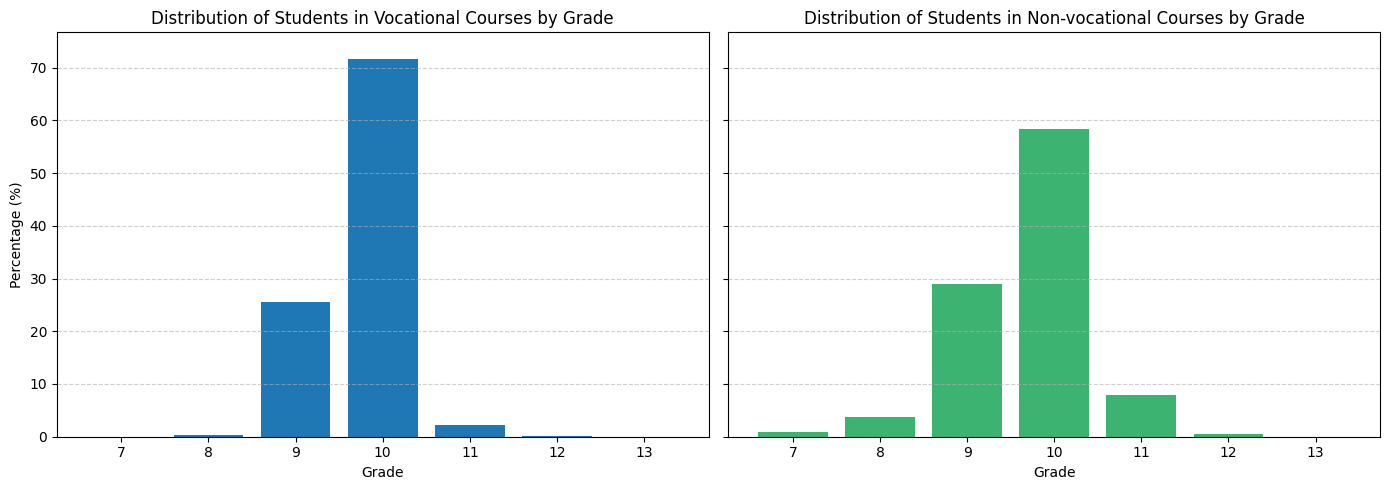

In [13]:
import matplotlib.pyplot as plt

grades = [7, 8, 9, 10, 11, 12, 13]

vocational_counts = [
    len(grade_7_vocational),
    len(grade_8_vocational),
    len(grade_9_vocational),
    len(grade_10_vocational),
    len(grade_11_vocational),
    len(grade_12_vocational),
    len(grade_13_vocational),
]

non_vocational_counts = [
    len(grade_7_non_vocational),
    len(grade_8_non_vocational),
    len(grade_9_non_vocational),
    len(grade_10_non_vocational),
    len(grade_11_non_vocational),
    len(grade_12_non_vocational),
    len(grade_13_non_vocational),
]

total_vocational = sum(vocational_counts)
total_non_vocational = sum(non_vocational_counts)

vocational_percent = [
    r / total_vocational * 100 if total_vocational > 0 else 0 for r in vocational_counts
]
non_vocational_percent = [
    nr / total_non_vocational * 100 if total_non_vocational > 0 else 0
    for nr in non_vocational_counts
]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].bar(grades, vocational_percent)
axes[0].set_title("Distribution of Students in Vocational Courses by Grade")
axes[0].set_xlabel("Grade")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xticks(grades)
axes[0].set_ylim(0, max(max(vocational_percent), max(non_vocational_percent)) + 5)
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

axes[1].bar(grades, non_vocational_percent, color="mediumseagreen")
axes[1].set_title("Distribution of Students in Non-vocational Courses by Grade")
axes[1].set_xlabel("Grade")
axes[1].set_xticks(grades)
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Se separarmos os anos mais representados no dataset (10º, 9º e 11º anos) por país, podemos observar, claramente, que a maioria dos alunos no 9º e 11º anos são sérvios e croatas; e os alunos no 10º são italianos e montenegrinos.

<!-- Isso pode ser justificado pela forma como funciona o sistema de ensino inglês. Veja: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

Essa diferença pode levar a uma representação desproporcional de alunos e devemos considerá-los como uma exceção na próxima fase. -->

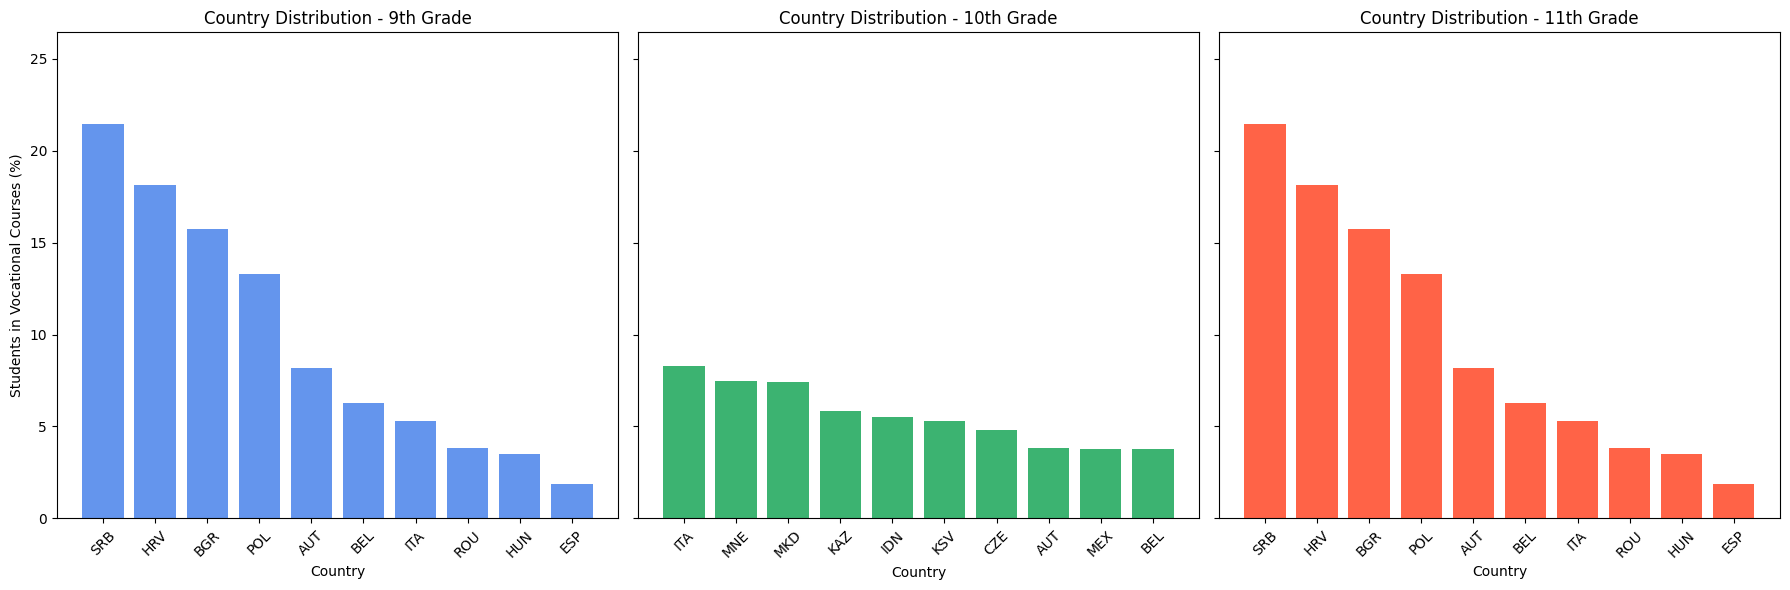

In [15]:
import matplotlib.pyplot as plt

grade_9 = filter_by_grade(vocational_students, 9)
grade_10 = filter_by_grade(vocational_students, 10)
grade_11 = filter_by_grade(vocational_students, 9)

grade_9_counts = grade_9["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_10_counts = grade_10["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_11_counts = grade_11["CNT"].value_counts(normalize=True).mul(100).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].bar(grade_9_counts.index, grade_9_counts.values, color="cornflowerblue")
axes[0].set_title("Country Distribution - 9th Grade")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Students in Vocational Courses (%)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(
    0, max(grade_9_counts.max(), grade_10_counts.max(), grade_11_counts.max()) + 5
)

axes[1].bar(grade_10_counts.index, grade_10_counts.values, color="mediumseagreen")
axes[1].set_title("Country Distribution - 10th Grade")
axes[1].set_xlabel("Country")
axes[1].tick_params(axis="x", rotation=45)

axes[2].bar(grade_11_counts.index, grade_11_counts.values, color="tomato")
axes[2].set_title("Country Distribution - 11th Grade")
axes[2].set_xlabel("Country")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Também é essencial examinar a correlação entre todas as variáveis do conjunto de dados e a variável alvo (Média do Resultado de Matemática). Isso ajuda a identificar quais variáveis estão fortemente associadas ao desempenho dos alunos e podem ser consideradas na próxima etapa de seleção de variáveis.

Calculamos essa correlação e as 20 principais variáveis foram visualizadas em uma tabela.

In [17]:
correl = (
    student.corr(numeric_only=True)["Avg Math Result"]
    .abs()
    .sort_values(ascending=False)
)

In [18]:
top_corr = correl.drop("Avg Math Result").head(20)

top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature", "Correlation with Math Result"]
display(top_corr_df)

,Feature,Correlation with Math Result
0,PV1MCQN,0.929339
1,PV4MCQN,0.929264
2,PV2MCQN,0.929218
3,PV7MCQN,0.929172
4,PV3MCQN,0.929133
5,PV10MCQN,0.929110
6,PV6MCQN,0.929085
7,PV5MCQN,0.929064
8,PV9MCQN,0.928844
9,PV8MCQN,0.928833


As principais variáveis obtidas são valores plausíveis, que podem ser utilizados em média, de forma semelhante à abordagem que usamos para calcular o Resultado de Matemática.

Algumas dessas variáveis representam subescalas da matemática e podem ser removidas do conjunto de dados na próxima fase, pois já estão contempladas na pontuação agregada do Resultado de Matemática.

### Categorical Values Analysis

Em relação aos valores categóricos, há alguns que são específicos de certos países. Como este estudo tem como foco a identificação de tendências globais, optamos por não incluir essas variáveis em nossa análise.

Códigos específicos por país:

- ST250D06JA  
- ST250D07JA  
- ST251D08JA  
- ST251D09JA  
- ST330D10WA  
- PROGN

Além disso, os códigos "CNT", "NatCen", "STRATUM" e "SUBNATION" estão todos relacionados ao país/região do aluno. Para reduzir a dimensionalidade do conjunto de dados, decidimos manter apenas "CNT", pois ele agrega de forma eficaz as informações dos demais.

"COBN_S", "COBN_M" e "COBN_F" representam o país de nascimento do estudante, da mãe e do pai, respectivamente. Esses foram excluídos para evitar o aumento da dimensionalidade com variáveis fortemente correlacionadas com "CNT".

"OCOD1", "OCOD2" e "OCOD3" representam a ocupação do estudante, da mãe e do pai. Embora, potencialmente, informativas, as ocupações podem variar muito entre países devido as diferenças culturais e econômicas. Por esse motivo, optamos por não incluí-las na análise atual.

Por fim, "VER_DAT" foi removida, pois contém apenas a data do questionário, a qual não é relevante para o nosso estudo.

"CNT" (País) é a única variável categórica mantida, mas contém um grande número de valores distintos, sendo necessário agrupá-los em menos categorias para evitar alta dimensionalidade em abordagens futuras, como o One-Hot Encoding.

## 2.4 Verify data quality

Nesta etapa, começamos verificando os valores ausentes no conjunto de dados.

Decidimos que variáveis com mais de 70% de dados ausentes podem levar a resultados tendenciosos, portanto, devem ser removidas do conjunto de dados futuramente.

In [19]:
print("\n--- Missing Values ---")
missing = student.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
ST326Q10JA    0.975654
ST326Q11JA    0.974807
ST326Q08JA    0.974330
ST326Q12JA    0.974207
ST326Q09JA    0.974018
                ...   
FLSCHOOL      0.733045
FL166Q01HA    0.732988
FL164Q01HA    0.731725
FL164Q09HA    0.730854
FCFMLRTY      0.721692
Length: 369, dtype: float64


Também realizamos uma verificação de consistência para verificar se havia linhas ou colunas duplicadas, mas não foram encontrados casos neste conjunto de dados.

In [2]:
print("\n--- Duplicated Rows ---")
duplicated_rows = student.duplicated().sum()
print(f"Duplicated rows: {duplicated_rows}")

print("\n--- Duplicated Columns ---")
duplicated_columns = student.T.duplicated().sum()
print(f"Duplicated columns: {duplicated_columns}")


--- Duplicated Rows ---


: 

In [59]:
filtered_students = student[(student["CNT"] != "b'GBR'")]
filtered_students

print(f"Países dos alunos de 12º ano:")
grade_12 = filter_by_grade(filtered_students, 12)
print(grade_12[["CNT"]].value_counts().head(10))

Países dos alunos de 12º ano:
CNT   
b'ARE'    247
b'CHE'    167
b'NZL'    125
b'KHM'     34
b'IRL'     25
b'BRA'     20
b'BRN'     20
b'IDN'     19
b'DOM'     18
b'SAU'     12
Name: count, dtype: int64


Todos os alunos de 15 anos no 11º, 12º e 13º vão também ser condiderados exceções. Uma vez que são casos raros, que são justificados por serem alunos sobredotados (e terem passado um ou mais anos à frente), o número de dados não é suficiente para fazer uma análise satisfatória.

In [62]:
grade_11 = filter_by_grade(filtered_students, 11)
print(
    f"Número de alunos no 11º ano: {len(grade_11) / len(filtered_students) * 100:.2f}%"
)

grade_12 = filter_by_grade(filtered_students, 12)
print(
    f"Número de alunos no 12º ano: {len(grade_12) / len(filtered_students) * 100:.2f}%"
)

grade_13 = filter_by_grade(filtered_students, 13)
print(
    f"Número de alunos no 13º ano: {len(grade_13) / len(filtered_students) * 100:.4f}%"
)

filtered_students = filtered_students[(~filtered_students["ST001D01T"].isin([11, 12, 13]))]

Número de alunos no 11º ano: 5.23%
Número de alunos no 12º ano: 0.12%
Número de alunos no 13º ano: 0.0002%


In [ ]:
from columns_list import (
    math_subscales,
    math_columns,
    science_columns,
    reading_columns,
    get_math_results,
    get_science_results,
    get_reading_results,
)


def remove_columns(dataframe, column_list):
    new_df = dataframe.copy()
    new_df = new_df.drop(columns=column_list)

    return new_df


def get_student_results(dataframe, math_columns, science_columns, reading_columns):
    new_df = dataframe.copy()
    new_df = get_math_results(new_df, math_columns)
    new_df = get_science_results(new_df, science_columns)
    new_df = get_reading_results(new_df, reading_columns)

    return new_df

Remove content subscales of mathematics

In [32]:
non_repeating_students = filtered_students[filtered_students["REPEAT"] == 0]
repeating_students = filtered_students[filtered_students["REPEAT"] == 1]


repeating_students_filtered = get_student_results(
    repeating_students, math_columns, science_columns, reading_columns
)
repeating_students_filtered = remove_columns(
    repeating_students_filtered, math_subscales
)
repeating_students_filtered

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,UNIT,WVARSTRR,SENWT,VER_DAT,Avg Math Result,Avg Science Result,Avg Reading Result
3,b'ALB',8.0,800245.0,800005.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,13.51571,4.53800,4.41017,1.0,38.0,1.49361,b'03MAY23:10:11:26',298.7323,210.1502,300.7753
11,b'ALB',8.0,800097.0,800014.0,b'08MS',b'000800',b'ALB04',b'0080000',800.0,0.0,...,6.27855,6.27855,2.14945,1.0,7.0,0.73293,b'03MAY23:10:11:25',427.2120,395.9179,371.7137
30,b'ALB',8.0,800281.0,800038.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,1.58343,5.11198,1.58343,2.0,31.0,0.57916,b'03MAY23:10:11:25',311.5034,228.9363,249.8068
37,b'ALB',8.0,800268.0,800047.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,6.75786,6.80700,6.61526,2.0,52.0,0.74681,b'03MAY23:10:11:26',230.1009,272.5924,277.4683
40,b'ALB',8.0,800212.0,800051.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,6.25923,2.00172,1.95807,1.0,78.0,0.71417,b'03MAY23:10:11:25',312.0356,385.0199,386.8497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613651,b'UZB',860.0,86000140.0,86007395.0,b'08MS',b'086000',b'UZB04',b'8600000',86000.0,0.0,...,83.33026,83.33026,39.79789,2.0,19.0,0.63855,b'02MAY23:13:18:13',299.9917,301.2023,251.9875
613662,b'UZB',860.0,86000105.0,86007406.0,b'08MS',b'086000',b'UZB17',b'8600000',86000.0,0.0,...,82.65206,28.96320,28.96320,2.0,54.0,0.58577,b'02MAY23:13:18:14',341.1871,309.7975,298.2344
613669,b'UZB',860.0,86000200.0,86007413.0,b'08MS',b'086000',b'UZB14',b'8600000',86000.0,0.0,...,34.68558,34.68558,104.05670,1.0,56.0,0.71953,b'02MAY23:13:18:14',341.6720,343.4569,339.0388
613678,b'UZB',860.0,86000041.0,86007422.0,b'08MS',b'086000',b'UZB05',b'8600000',86000.0,0.0,...,31.98757,31.98757,31.98757,1.0,69.0,0.66356,b'02MAY23:13:18:13',341.6767,317.8129,284.9316


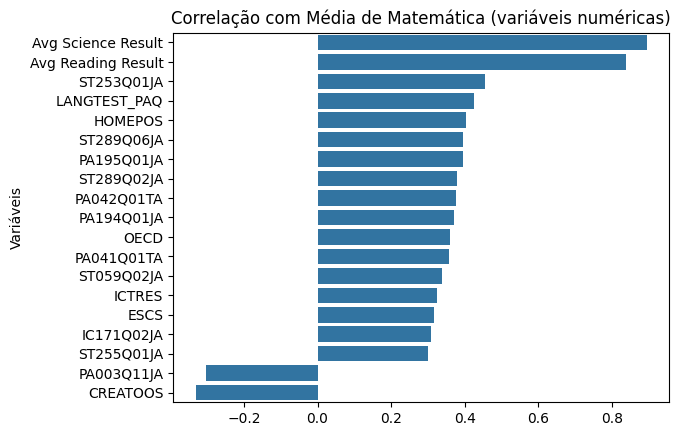

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_correlations = repeating_students_filtered.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

numeric_correlations = numeric_correlations.drop("Avg Math Result")

correlations = numeric_correlations[numeric_correlations.abs() > 0.3]

sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlação com Média de Matemática (variáveis numéricas)")
plt.ylabel("Variáveis")
plt.show()

In [39]:
grade_7_repeating = filter_by_grade(repeating_students_filtered, 7)
grade_8_repeating = filter_by_grade(repeating_students_filtered, 8)
grade_9_repeating = filter_by_grade(repeating_students_filtered, 9)
grade_10_repeating = filter_by_grade(repeating_students_filtered, 10)

numeric_correlations_grade_7 = grade_7_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
numeric_correlations_grade_8 = grade_8_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
numeric_correlations_grade_9 = grade_9_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)
numeric_correlations_grade_10 = grade_10_repeating.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)


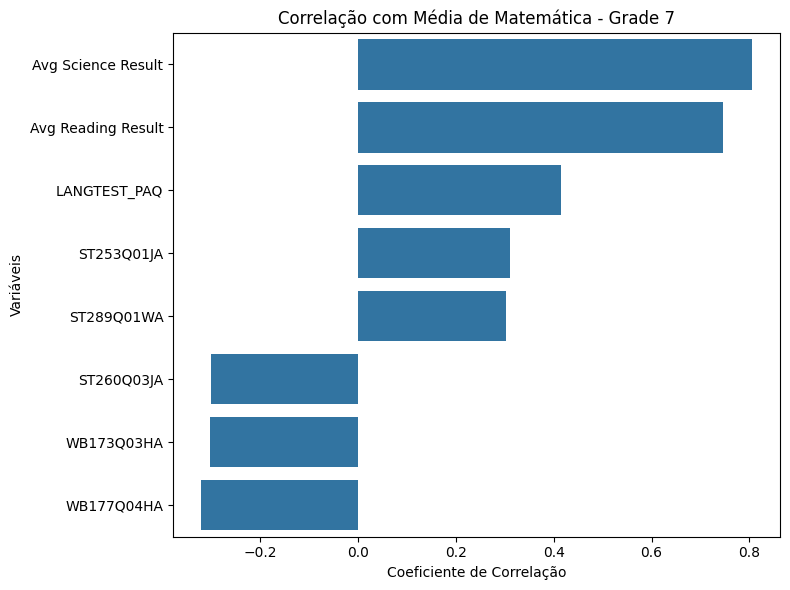

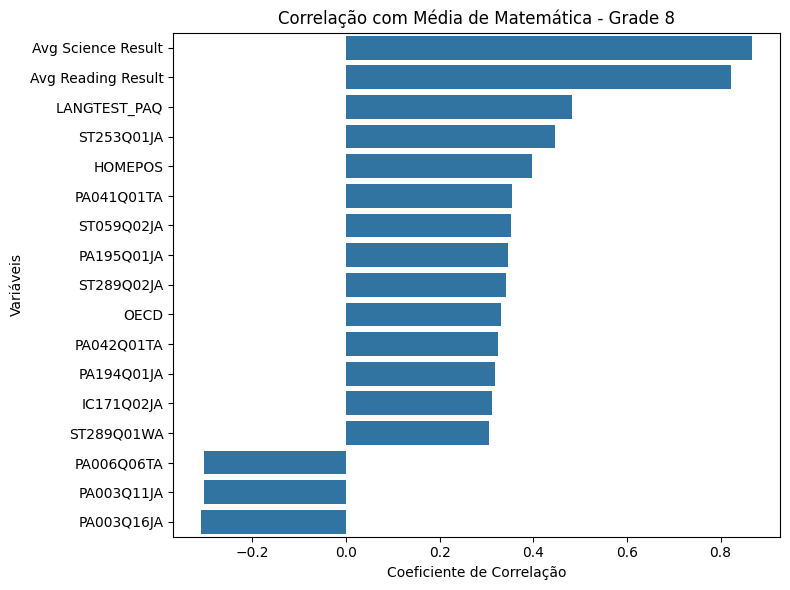

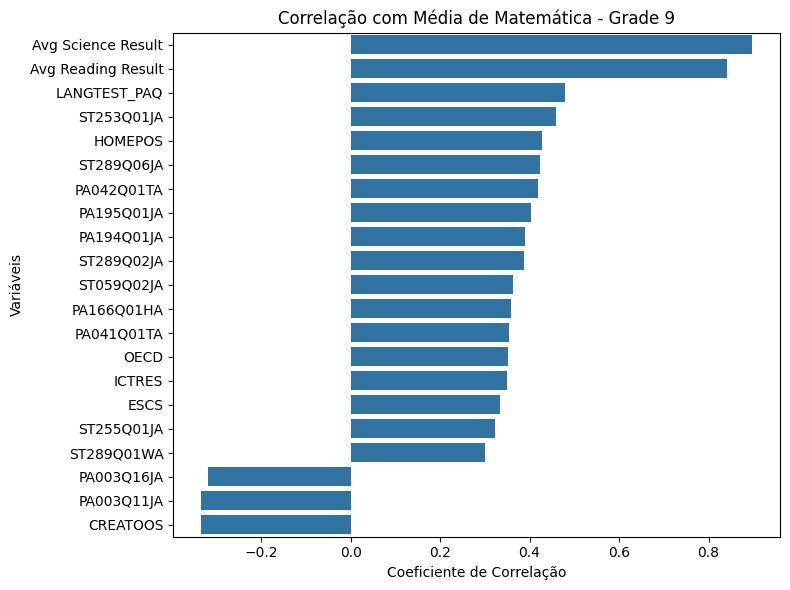

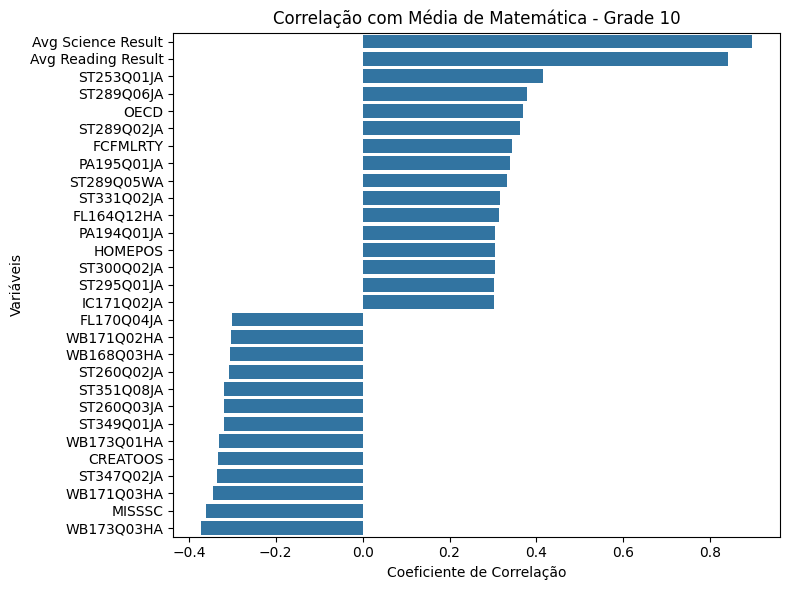

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_dict = {
    7: numeric_correlations_grade_7,
    8: numeric_correlations_grade_8,
    9: numeric_correlations_grade_9,
    10: numeric_correlations_grade_10,
}

for grade, correlations in correlation_dict.items():
    correlations = correlations.drop("Avg Math Result")
    filtered_correlations = correlations[correlations.abs() > 0.3]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=filtered_correlations.values, y=filtered_correlations.index)
    plt.title(f"Correlação com Média de Matemática - Grade {grade}")
    plt.xlabel("Coeficiente de Correlação")
    plt.ylabel("Variáveis")
    plt.tight_layout()
    plt.show()

In [10]:
categorical_columns = repeating_students_filtered.select_dtypes(
    include=["object", "category"]
).columns

categorical_columns

Index(['CNT', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'ST250D06JA',
       'ST250D07JA', 'ST251D08JA', 'ST251D09JA', 'ST330D10WA', 'OCOD1',
       'OCOD2', 'OCOD3', 'PROGN', 'COBN_S', 'COBN_M', 'COBN_F', 'VER_DAT'],
      dtype='object')

CNT, NatCen, STRATUM, SUBNATION - Relacionados (País)

COBN_S, COBN_M, COBN_F - País de nascimento próprio, mãe e pai, respetivamente

OCOD1, OCOD2, OCOD3 - Ocupação mãe, pai e próprio, respetivamente

Country specific:

ST250D06JA, ST250D07JA

ST251D08JA, ST251D09JA

ST330D10WA 

PROGN

## Show relation of students by country that repeated

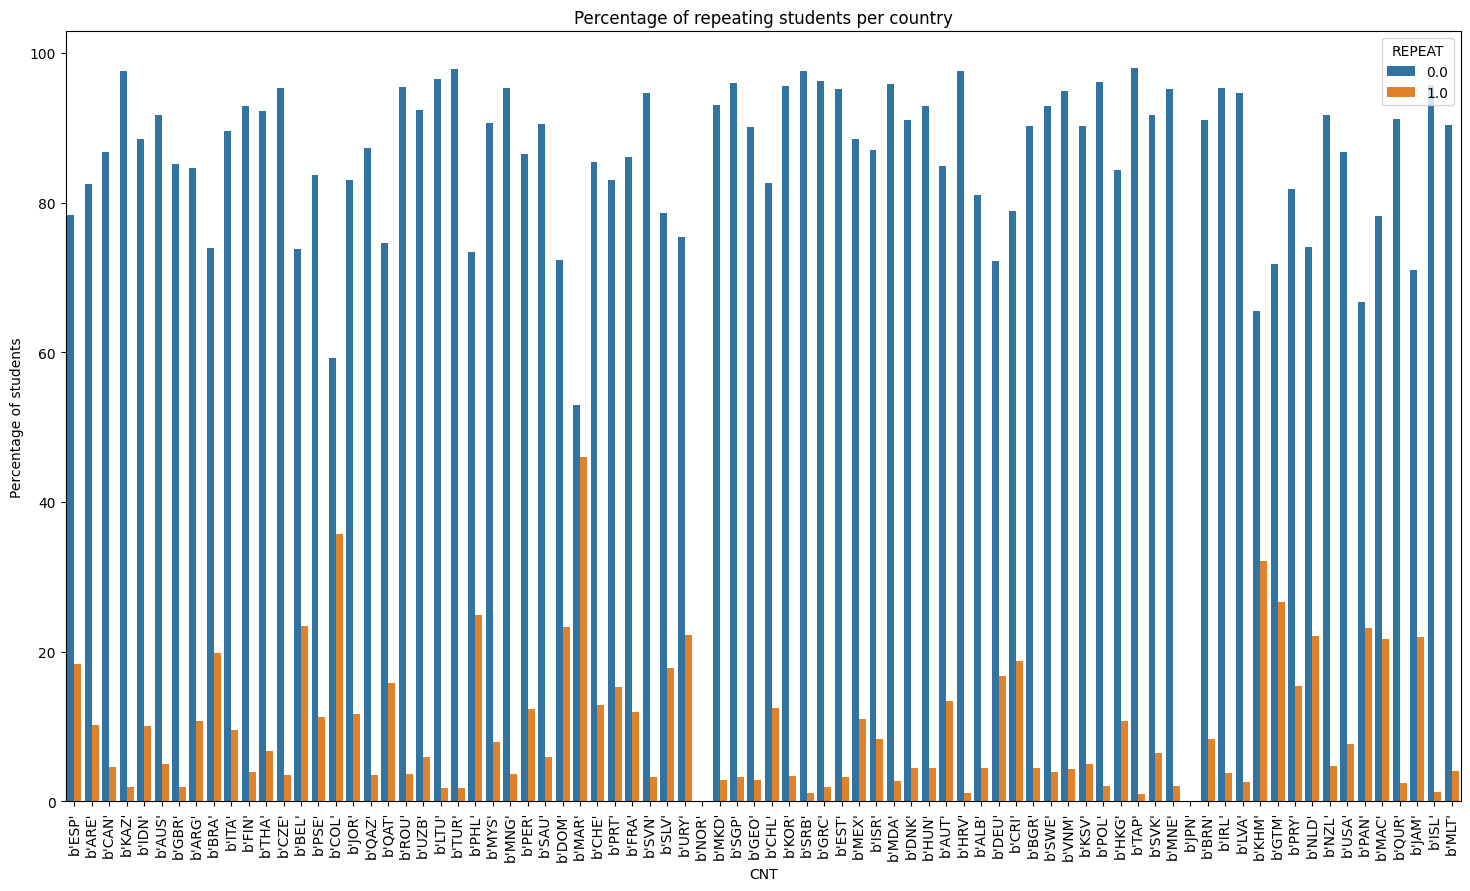

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

student_repeat = student.groupby(["CNT", "REPEAT"]).size().reset_index(name="count")
cnt_totals = student["CNT"].value_counts()

plt.figure(figsize=[18, 10])

sns.barplot(
    data=student_repeat,
    x="CNT",
    y=student_repeat.apply(
        lambda row: (row["count"] / cnt_totals[row["CNT"]]) * 100, axis=1
    ),
    hue="REPEAT",
    order=cnt_totals.index,
)

plt.title("Percentage of repeating students per country")
plt.xticks(rotation="vertical")
plt.ylabel("Percentage of students")

plt.show()